# Probability: stop loss 

In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ffn
import yfinance as yf

%matplotlib inline

pd.options.display.max_rows = 99999

In [2]:
dataset = yf.download('X', 
                      start='2019-01-01', 
                      end='2022-04-18', 
                      progress=False,
)
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,18.400000,18.650000,17.860001,18.240000,17.814493,5446700
2019-01-02,17.790001,18.820000,17.639999,18.510000,18.078199,7803700
2019-01-03,18.379999,18.920000,18.270000,18.480000,18.048897,8359100
2019-01-04,18.840000,20.540001,18.780001,20.340000,19.865511,10737800
2019-01-07,20.930000,21.000000,20.160000,20.450001,19.972944,12320700


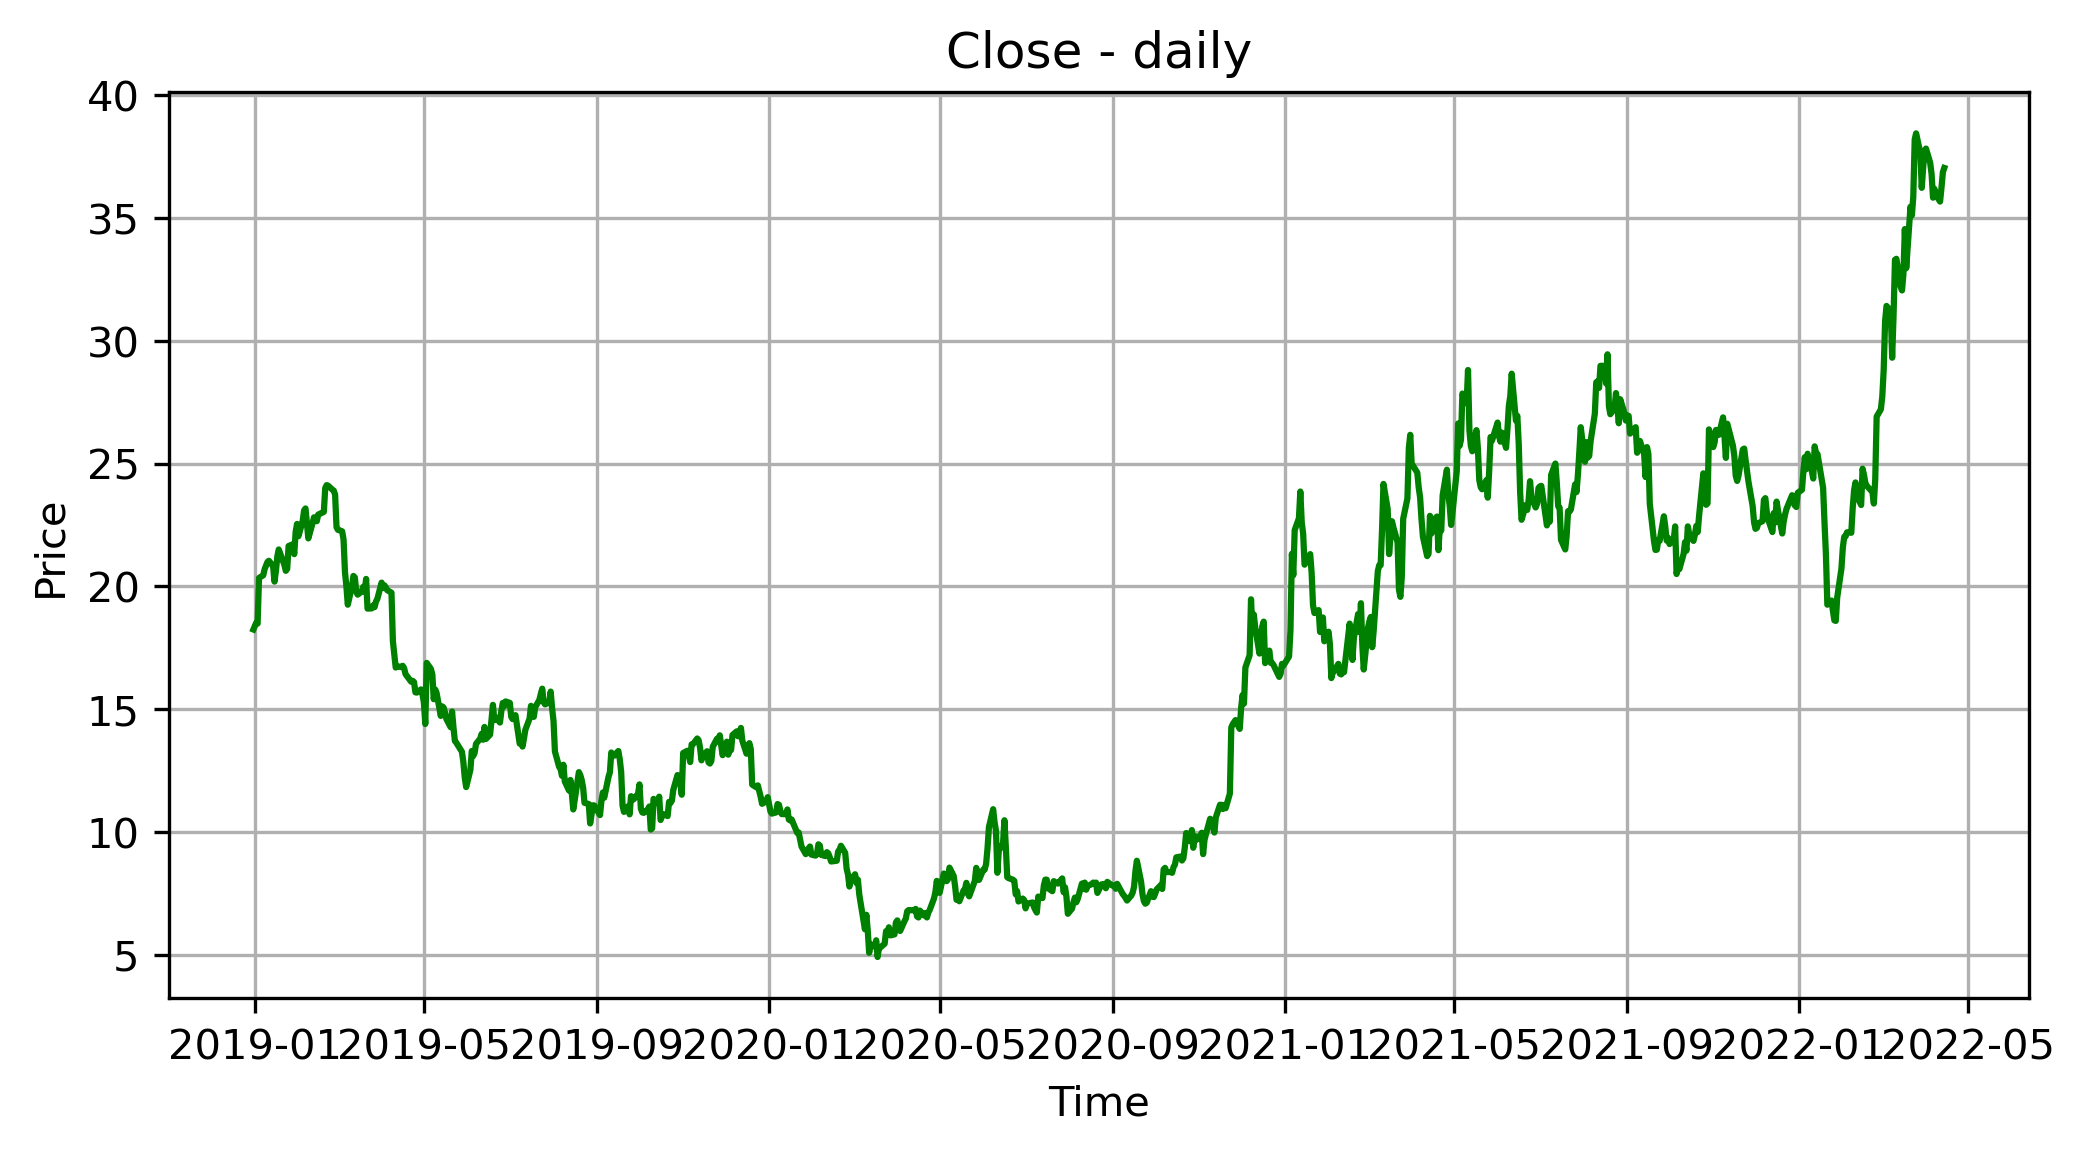

In [3]:
plt.figure(figsize=(8,4), dpi=300)
plt.plot(dataset.Close, color='green')
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Close - daily")
plt.grid(True)
plt.show()

In [4]:
dataset.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,Open,High,Low,Close,Adj Close,Volume
count,830.000000,830.000000,830.000000,830.000000,830.000000,8.300000e+02
mean,16.981807,17.443783,16.559458,16.994024,16.856472,1.623011e+07
std,7.477173,7.670637,7.312482,7.504363,7.497098,8.490462e+06
min,4.800000,5.340000,4.540000,4.900000,4.854944,4.423400e+06
1%,5.764500,6.035100,5.468700,5.791600,5.738346,5.713762e+06
5%,7.004500,7.294500,6.817000,7.074500,7.018784,7.186550e+06
10%,7.640000,7.889000,7.430000,7.649000,7.598063,8.014050e+06
25%,10.422500,10.677500,10.115000,10.407500,10.318145,1.033740e+07
50%,16.460000,16.905000,16.170000,16.470000,16.332882,1.436090e+07
75%,22.997500,23.580000,22.370001,23.002500,22.815304,1.966962e+07


In [5]:
dataset['AvgPrice'] = round(dataset.mean(axis=1),2)
dataset['Range'] = round(dataset.High - dataset.Low,2)
dataset['Body'] = abs(dataset.Open - dataset.Close)
dataset['CO'] = round(dataset.Close - dataset.Open,2)
dataset['OL'] = round((dataset.Open - dataset.Low),2)
dataset['HO'] = round((dataset.High - dataset.Open),2)
dataset['CL'] = round((dataset.Close - dataset.Low),2)
dataset['HC'] = round((dataset.High - dataset.Close),2)
dataset['BodyRangePerc'] = round(dataset.Body/dataset.Range * 100,2)
# Percentuale della barra (all'interno del range) dove si attesta il close
dataset['ClosePerc'] = round((dataset.Close - dataset.Low) * 100 / dataset.Range,2)
dataset['Color'] = list(map(lambda x: "black" if x <= 0 else "white", dataset.CO))

dataset.head(10)

,Open,High,Low,Close,Adj Close,Volume,AvgPrice,Range,Body,CO,OL,HO,CL,HC,BodyRangePerc,ClosePerc,Color
Date,,,,,,,,,,,,,,,,,
2018-12-31,18.400000,18.650000,17.860001,18.240000,17.814493,5446700,907798.49,0.79,0.160000,-0.16,0.54,0.25,0.38,0.41,20.25,48.10,black
2019-01-02,17.790001,18.820000,17.639999,18.510000,18.078199,7803700,1300631.81,1.18,0.719999,0.72,0.15,1.03,0.87,0.31,61.02,73.73,white
2019-01-03,18.379999,18.920000,18.270000,18.480000,18.048897,8359100,1393198.68,0.65,0.100000,0.10,0.11,0.54,0.21,0.44,15.38,32.31,white
2019-01-04,18.840000,20.540001,18.780001,20.340000,19.865511,10737800,1789649.73,1.76,1.500000,1.50,0.06,1.70,1.56,0.20,85.23,88.64,white
2019-01-07,20.930000,21.000000,20.160000,20.450001,19.972944,12320700,2053467.09,0.84,0.480000,-0.48,0.77,0.07,0.29,0.55,57.14,34.52,black
2019-01-08,20.570000,21.200001,20.360001,20.700001,20.217108,8463400,1410583.84,0.84,0.130001,0.13,0.21,0.63,0.34,0.50,15.48,40.48,white
2019-01-09,20.940001,21.000000,20.150000,20.840000,20.353842,9685600,1614283.88,0.85,0.100000,-0.10,0.79,0.06,0.69,0.16,11.76,81.18,black
2019-01-10,20.590000,21.150000,20.420000,20.990000,20.500345,7419400,1236583.94,0.73,0.400000,0.40,0.17,0.56,0.57,0.16,54.79,78.08,white
2019-01-11,20.840000,21.080000,20.510000,21.040001,20.549181,8024300,1337400.67,0.57,0.200001,0.20,0.33,0.24,0.53,0.04,35.09,92.98,white


C:\Users\Desktop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Desktop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


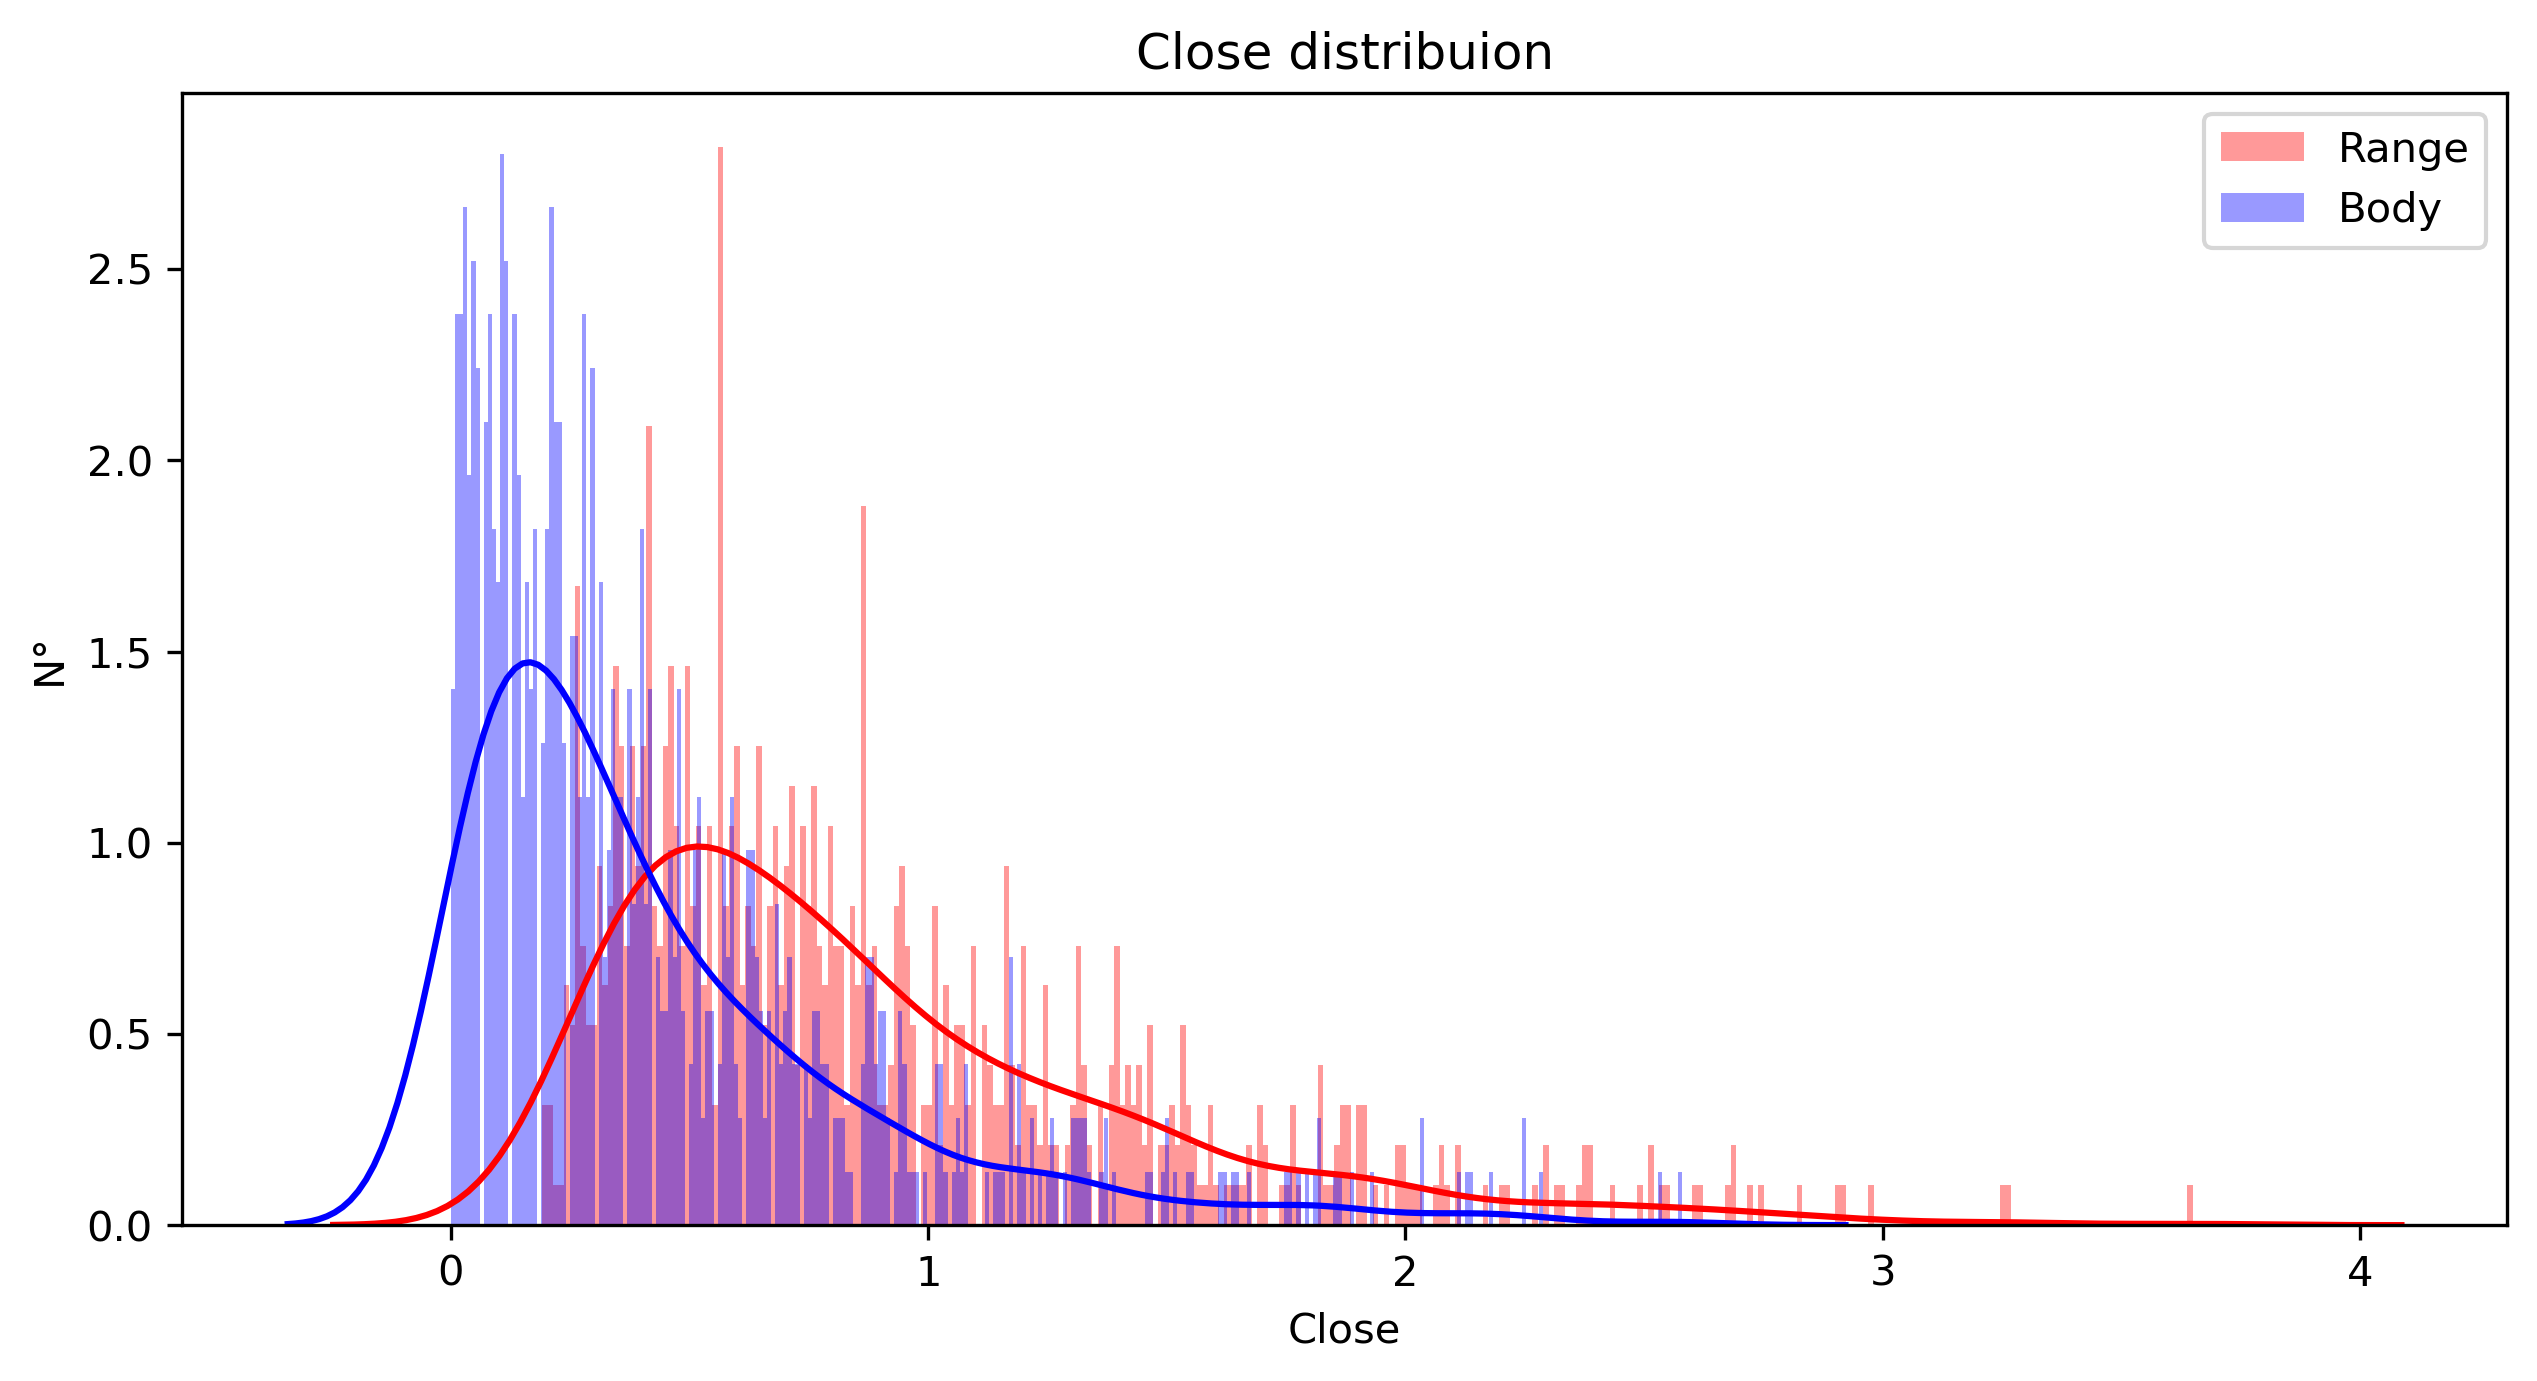

In [6]:
plt.figure(figsize=(10,5),dpi=300)
sns.distplot(dataset.Range, bins=300, color="red", label='Range')
sns.distplot(dataset.Body, bins=300, color="blue", label='Body')
plt.title("Close distribuion")
plt.xlabel("Close")
plt.ylabel("N°")
plt.legend()
plt.show()

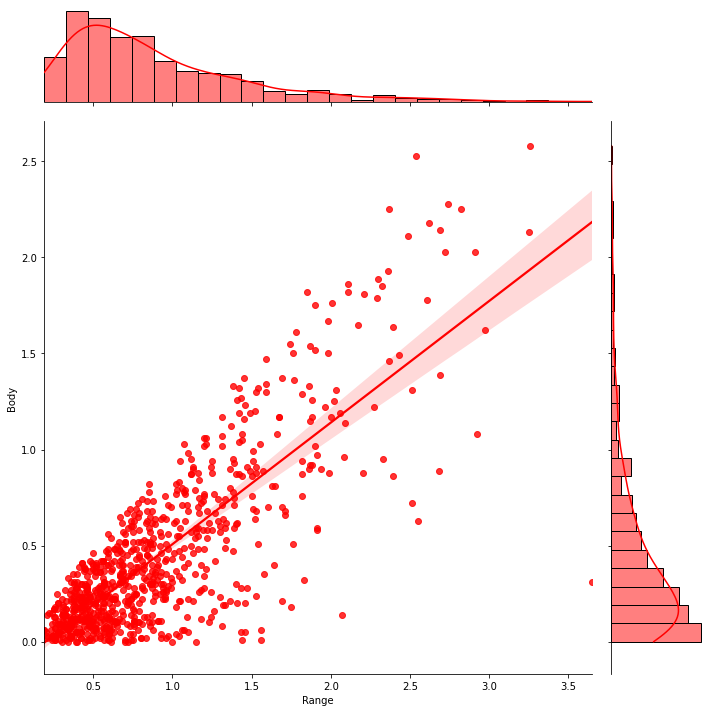

In [7]:
sns.jointplot(x='Range', y='Body', height=10, data=dataset, color='r', kind='reg');

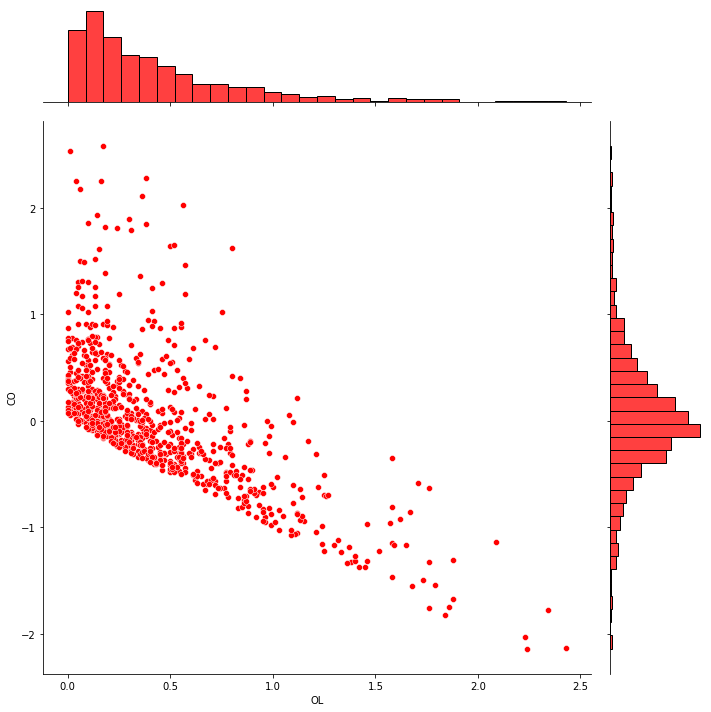

In [8]:
sns.jointplot(x='OL', y='CO', height=10, data = dataset, kind='scatter', color='r');

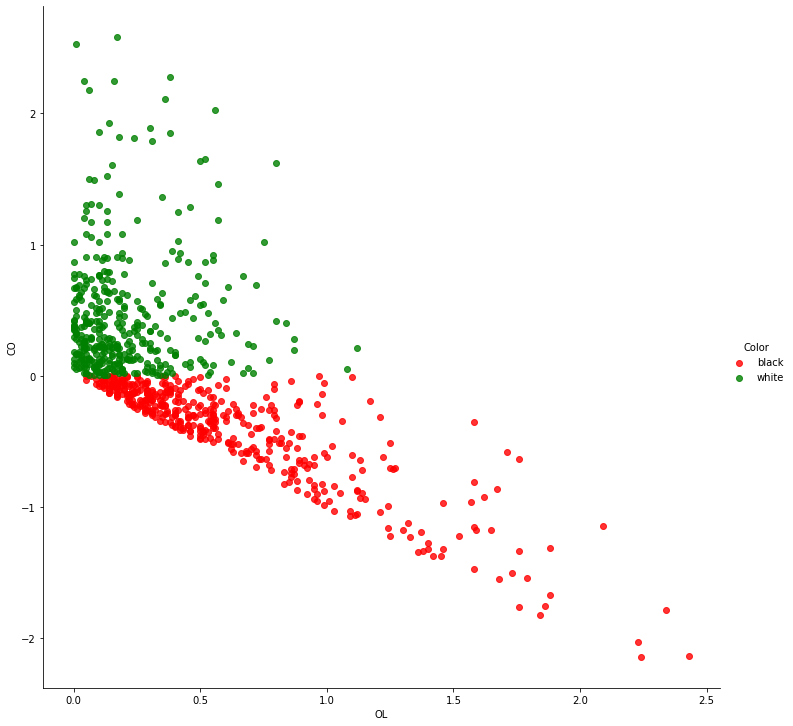

In [9]:
sns.lmplot(x = "OL", y = "CO", height = 10, hue = "Color", data = dataset, fit_reg = False, 
           palette = dict(white = "green", black = "red"));

In [10]:
print("Positive:",dataset[dataset['CO'] > 0]['OL'].describe([.25,.5,.75,.8,.9,.95,.99]).transpose())
print("")
print("StopLoss long on 95°quantile:",
      round(-dataset[dataset['CO'] > 0]['OL'].quantile(.95),2))
print("StopLoss long on 99°quantile:",
      round(-dataset[dataset['CO'] > 0]['OL'].quantile(.99),2))

Positive: count    398.000000
mean       0.207688
std        0.195496
min        0.000000
25%        0.070000
50%        0.140000
75%        0.300000
80%        0.340000
90%        0.503000
95%        0.581500
99%        0.840900
max        1.120000
Name: OL, dtype: float64

StopLoss long on 95°quantile: -0.58
StopLoss long on 99°quantile: -0.84


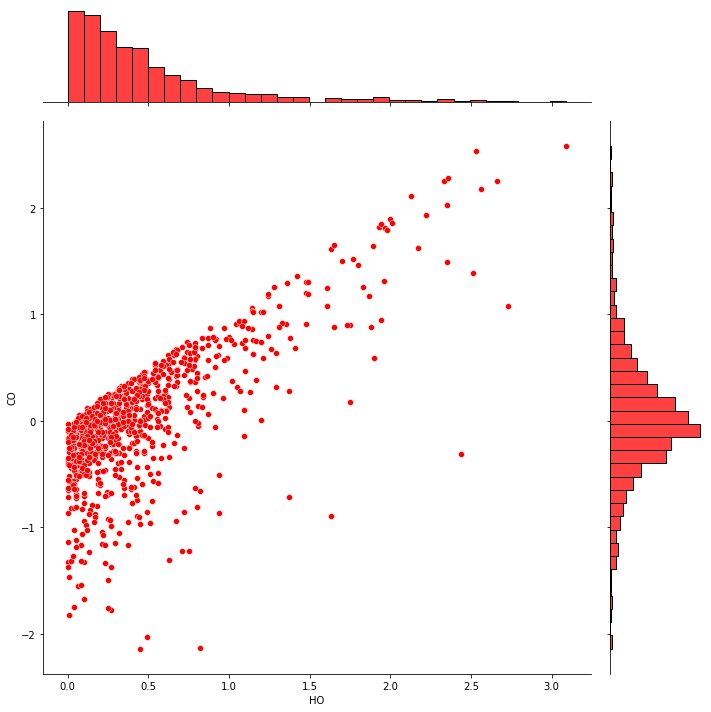

In [11]:
sns.jointplot(x='HO', y='CO', height=10, data=dataset, kind='scatter', color='r');

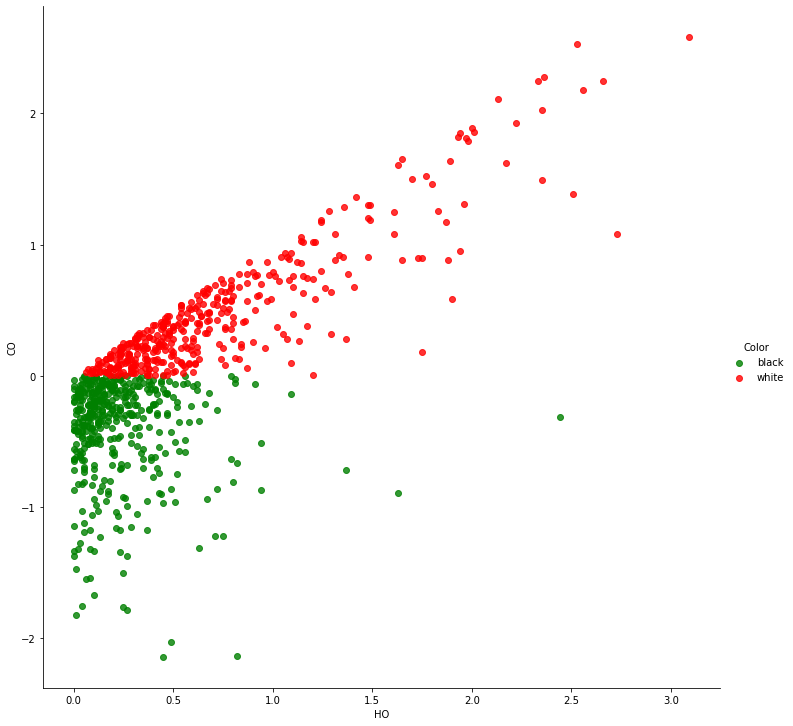

In [12]:
sns.lmplot(x = "HO", y = "CO", height = 10, hue = "Color", data = dataset, fit_reg = False, 
           palette = dict(white = "red", black = "green"));

In [13]:
print("Negative:",dataset[dataset['CO'] < 0]['HO'].describe([.25,.5,.75,.8,.9,.95,.99]).transpose())
print("")
print("StopLoss short on 95° quantile :",
      round(-dataset[dataset['CO'] < 0]['HO'].quantile(.95),2))
print("StopLoss short on 99° quantile:",
      round(-dataset[dataset['CO'] < 0]['HO'].quantile(.99),2))

Negative: count    422.000000
mean       0.224597
std        0.238729
min        0.000000
25%        0.080000
50%        0.150000
75%        0.310000
80%        0.370000
90%        0.489000
95%        0.629500
99%        0.940000
max        2.440000
Name: HO, dtype: float64

StopLoss short on 95° quantile : -0.63
StopLoss short on 99° quantile: -0.94


# An alternative

stoploss for LONG positions based on 95° quantile of OpenLow for CloseOpen positive and, for SHORT, based on 95° quantile of HighOpen for CloseOpen negative:

In [14]:
print("Positive:",dataset[dataset['CO'] > 0]['OL'].describe([.25,.5,.75,.8,.9,.95,.99]).transpose())
print("")
print("Negative:",dataset[dataset['CO'] < 0]['HO'].describe([.25,.5,.75,.8,.9,.95,.99]).transpose())
print("")
print("StopLoss long on 95° quantile:",
      round(-dataset[dataset['CO'] > 0]['OL'].quantile(.95),2))
print("StopLoss short on 95° quantile:",
      -dataset[dataset['CO'] < 0]['HO'].quantile(.95))
print("")
print("StopLoss long on 99° quantile:",
      round(-dataset[dataset['CO'] > 0]['OL'].quantile(.99),2))
print("StopLoss short on 99° quantile:",
      -dataset[dataset['CO'] < 0]['HO'].quantile(.99))

Positive: count    398.000000
mean       0.207688
std        0.195496
min        0.000000
25%        0.070000
50%        0.140000
75%        0.300000
80%        0.340000
90%        0.503000
95%        0.581500
99%        0.840900
max        1.120000
Name: OL, dtype: float64

Negative: count    422.000000
mean       0.224597
std        0.238729
min        0.000000
25%        0.080000
50%        0.150000
75%        0.310000
80%        0.370000
90%        0.489000
95%        0.629500
99%        0.940000
max        2.440000
Name: HO, dtype: float64

StopLoss long on 95° quantile: -0.58
StopLoss short on 95° quantile: -0.6294999999999998

StopLoss long on 99° quantile: -0.84
StopLoss short on 99° quantile: -0.94
